# **Bioinformatics Project - Computational Drug Discovery [Part III ] Regression Models with Random Forest**

Nusrat Jahan

In this Jupyter notebook, we will be building a real-life **data science project**, we will be building a machine learning model using the ChEMBL bioactivity data.


In **Part III **, we will be building a regression model of ER-alpha inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [55]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [73]:
df_PubChem = pd.read_csv('/content/ERA_bioactivity_data_pIC50_pubchemfp_name.csv')
df_PubChem

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,CHEMBL431611,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.602060
1,CHEMBL316132,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.124939
2,CHEMBL85881,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.408935
3,CHEMBL85536,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.130768
4,CHEMBL83451,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.309804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,CHEMBL4779838,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.119186
1468,CHEMBL68236,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.494850
1469,CHEMBL4873534,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
1470,CHEMBL71584,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.744727


### Renaming Name coulumn to chemblId

In [74]:
df_PubChem = df_PubChem.rename(columns = {'Name':'chemblId'})
df_PubChem

,chemblId,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,CHEMBL431611,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.602060
1,CHEMBL316132,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.124939
2,CHEMBL85881,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.408935
3,CHEMBL85536,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.130768
4,CHEMBL83451,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.309804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,CHEMBL4779838,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.119186
1468,CHEMBL68236,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.494850
1469,CHEMBL4873534,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
1470,CHEMBL71584,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.744727


### Normalizing the Fetearues

The sklearn.preprocessing package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

In general, learning algorithms benefit from standardization of the data set. If some outliers are present in the set, robust scalers or transformers are more appropriate. The behaviors of the different scalers, transformers, and normalizers on a dataset containing marginal outliers is highlighted in Compare the effect of different scalers on data with outliers.

* Standardization, or mean removal and variance scaling

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) may assume that all features are centered around zero or have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [75]:
#df_pubchem_X = df_PubChem.drop(columns=['chemblId'])
df_pubchem_X= df_PubChem.drop(columns=['pIC50'])
df_pubchem_X

,chemblId,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL431611,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL316132,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL85881,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL85536,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL83451,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,CHEMBL4779838,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1468,CHEMBL68236,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1469,CHEMBL4873534,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1470,CHEMBL71584,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
from sklearn import preprocessing

def normalized (Fp):
    
    chemblId = Fp.chemblId
    Fp_loc = Fp.iloc[:,1:]
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(Fp_loc)
    Fp_normalized = pd.DataFrame(np_scaled)
    Fp_normalized
    Fp_normalized = pd.DataFrame(np_scaled, columns=Fp_loc.columns)
    Fp_normalized['chemblId'] = chemblId
    
    return Fp_normalized

In [77]:
Fp_pubchem_normalized = normalized (df_pubchem_X)

#### Saving into new csv file

In [78]:
Fp_pubchem_normalized.to_csv('Pubchem_normalized.csv', sep=',' ,index=False)
Fp_pubchem_normalized

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,chemblId
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CHEMBL431611
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CHEMBL316132
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CHEMBL85881
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CHEMBL85536
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CHEMBL83451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CHEMBL4779838
1468,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CHEMBL68236
1469,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CHEMBL4873534
1470,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CHEMBL71584


### checking the variance of the features

In [79]:
Fp_pubchem_normalized = Fp_pubchem_normalized.drop(columns=['chemblId'])
Fp_pubchem_normalized

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1468,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1469,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1470,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
Fp_pubchem_normalized_variance = Fp_pubchem_normalized.var()
Fp_pubchem_normalized_variance

PubchemFP0      0.000000
PubchemFP1      0.008091
PubchemFP2      0.214734
PubchemFP3      0.166752
PubchemFP4      0.000000
                  ...   
PubchemFP876    0.000000
PubchemFP877    0.000000
PubchemFP878    0.000000
PubchemFP879    0.000000
PubchemFP880    0.000000
Length: 881, dtype: float64

In [81]:
Fp_pubchem_normalized_columns = Fp_pubchem_normalized.columns
Fp_pubchem_normalized_columns

Index(['PubchemFP0', 'PubchemFP1', 'PubchemFP2', 'PubchemFP3', 'PubchemFP4',
       'PubchemFP5', 'PubchemFP6', 'PubchemFP7', 'PubchemFP8', 'PubchemFP9',
       ...
       'PubchemFP871', 'PubchemFP872', 'PubchemFP873', 'PubchemFP874',
       'PubchemFP875', 'PubchemFP876', 'PubchemFP877', 'PubchemFP878',
       'PubchemFP879', 'PubchemFP880'],
      dtype='object', length=881)

In [67]:
Fp_pubchem_normalized .set_index('chemblId', inplace=True) 

### Save into new files

In [68]:
Fp_pubchem_normalized.to_csv('ER_alpha_PubChem.csv'      , sep=',' ,index=True)

### Input features
The ***ER-alpha-inhibitors *** 

AP2DFC data set contains 780 input features and 1 output variable (pIC50 values).

AP2DFP data set contains 780 input features and 1 output variable (pIC50 values).

MACCS data set contains 166 input features and 1 output variable (pIC50 values).

PubChem data set contains 881 input features and 1 output variable (pIC50 values).

In [69]:
print (len(Fp_pubchem_normalized))

1472


In [70]:
print (len(Fp_pubchem_normalized.columns ))

881


## Remove low variance Features

In [84]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.05):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

df_pubchem_X = remove_low_variance(Fp_pubchem_normalized, threshold=0.05)
df_pubchem_X
df_pubchem_X.var()

PubchemFP2      0.214734
PubchemFP3      0.166752
PubchemFP12     0.126729
PubchemFP13     0.066288
PubchemFP14     0.191968
                  ...   
PubchemFP821    0.191311
PubchemFP825    0.072070
PubchemFP826    0.061006
PubchemFP839    0.097478
PubchemFP860    0.120443
Length: 290, dtype: float64

In [85]:
df_pubchem_X.head()

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,...,PubchemFP804,PubchemFP805,PubchemFP818,PubchemFP819,PubchemFP820,PubchemFP821,PubchemFP825,PubchemFP826,PubchemFP839,PubchemFP860
0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Remove highly correlated features
In many datasets we find some of the features which are highly correlated that means which are some what linearly dependent with other features. These features contribute very less in predicting the output but increses the computational cost. 

In [86]:
from scipy import stats

def correlation(df, threshold):

    des3 = len(df.columns) 
    corr = stats.pearsonr
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in df.columns:
                    del df[colname] # deleting the column from the dataset
    des4 = len(df.columns) 

    print('from Remove correlation')
    print("The initial set of " + str(des3) + ' descriptors'+ 
           " has been reduced to " + str(des4) + " descriptors.")

    return df

df = df_pubchem_X
threshold = 0.70 
df_pubchem_X_final = correlation(df, threshold)


from Remove correlation
The initial set of 290 descriptors has been reduced to 85 descriptors.


In [87]:
df_pubchem_X_final

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,...,PubchemFP697,PubchemFP699,PubchemFP712,PubchemFP713,PubchemFP716,PubchemFP734,PubchemFP735,PubchemFP737,PubchemFP755,PubchemFP756
0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1469,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1470,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
df_pubchem_X_final.shape

(1472, 85)

In [89]:
df_pubchem_Y_final = df_PubChem['pIC50']
df_pubchem_Y_final

0       8.602060
1       8.124939
2       8.408935
3       8.130768
4       6.309804
          ...   
1467    9.119186
1468    8.494850
1469    5.000000
1470    8.744727
1471    8.397940
Name: pIC50, Length: 1472, dtype: float64

In [90]:
data_pubchem = pd.concat([df_pubchem_X_final,df_pubchem_Y_final], axis=1)
data_pubchem

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,...,PubchemFP699,PubchemFP712,PubchemFP713,PubchemFP716,PubchemFP734,PubchemFP735,PubchemFP737,PubchemFP755,PubchemFP756,pIC50
0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.602060
1,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.124939
2,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.408935
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.130768
4,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.309804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9.119186
1468,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.494850
1469,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.000000
1470,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.744727


### Function for Machine Learning Model

In [91]:
! pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
import sklearn

In [110]:
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from collections import defaultdict


Q2_CV = []
RMSE_CV = []
R2_CV = []

R2_train = []
RMSE_train = []
Q2_train = []

R2_test = []
Q2_test = []
RMSE_test = []

def build_model(X, Y, seed):
    
    
    #Data split using 70/30 ratio
    X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                        Y, test_size=0.3,
                                                        random_state=seed)

    # Training set
    # n_estimators = The number of trees in the forest
    # max_features = The number of features to consider when looking for the best split
    # min_samples_leaf = The minimum number of samples required to be at a leaf node
    # n_jobs = The number of jobs to run in parallel
    # random_state = Controls both the randomness of the bootstrapping of the samples used when building trees 

    rf = RandomForestRegressor(n_estimators=400, 
                               max_features='sqrt', 
                               min_samples_leaf = 1,
                               random_state = 13,
                               n_jobs=-1)
    
    rf.fit(X_train,Y_train)
    prediction = rf.predict(X_train)
    

    #A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. 
    # In the basic approach, called k-fold CV, the training set is split into k smaller sets 
    # (other approaches are described below, but generally follow the same principles). 
    # The following procedure is followed for each of the k “folds”:
    # A model is trained using k−1 of the folds as training data;
    # the resulting model is validated on the remaining part of the data 
    # (i.e., it is used as a test set to compute a performance measure such as accuracy).
    # The performance measure reported by k-fold cross-validation is then the average of 
    # the values computed in the loop. This approach can be computationally expensive, 
    # but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.
    # 10 fold Cross-validation
    #cv = cross_validate.cross_val_predict(rf, X_train, Y_train, cv=10, n_jobs=-1)
    
    # External set  
    prediction_test = rf.predict(X_test)
    
    #print result from each seed    
    R2_train.append(r2_score(Y_train, prediction))
    RMSE_train.append(np.sqrt(mean_absolute_error(Y_train, prediction)))
    #Q2_CV.append(r2_score(Y_train, cv))
    #RMSE_CV.append(np.sqrt(mean_absolute_error(Y_train, cv)))
    Q2_test.append(r2_score(Y_test, prediction_test))
    RMSE_test.append((mean_absolute_error(Y_test, prediction_test)))
    
    
    
    return R2_train, RMSE_train, Q2_test, RMSE_test 

In [111]:
X = df_pubchem_X_final
Y = df_pubchem_Y_final
seed = 100
build_model(X, Y, seed)


([0.9116900036893836],
 [0.5551308126791747],
 [0.5934612832960557],
 [0.6500435833985581])

In [108]:
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from collections import defaultdict


R2_train = []
RMSE_train = []

Q2_test = []
RMSE_test = []

def build_model(X, Y, seed):
    
    
    #Data split using 70/30 ratio
    X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                        Y, test_size=0.3,
                                                        random_state=seed)

    # Training set
    # n_estimators = The number of trees in the forest
    # max_features = The number of features to consider when looking for the best split
    # min_samples_leaf = The minimum number of samples required to be at a leaf node
    # n_jobs = The number of jobs to run in parallel
    # random_state = Controls both the randomness of the bootstrapping of the samples used when building trees 

    rf = RandomForestRegressor(n_estimators=400, 
                               max_features='sqrt', 
                               min_samples_leaf = 1,
                               random_state = 13,
                               n_jobs=-1)
    
    rf.fit(X_train,Y_train)
    prediction = rf.predict(X_train)
    

    #A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. 
    # In the basic approach, called k-fold CV, the training set is split into k smaller sets 
    # (other approaches are described below, but generally follow the same principles). 
    # The following procedure is followed for each of the k “folds”:
    # A model is trained using k−1 of the folds as training data;
    # the resulting model is validated on the remaining part of the data 
    # (i.e., it is used as a test set to compute a performance measure such as accuracy).
    # The performance measure reported by k-fold cross-validation is then the average of 
    # the values computed in the loop. This approach can be computationally expensive, 
    # but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.
    # 10 fold Cross-validation
    #cv = cross_validate.cross_val_predict(rf, X_train, Y_train, cv=10, n_jobs=-1)
    
    # External set  
    prediction_test = rf.predict(X_test)
    
    #print result from each seed    
    R2_train.append(r2_score(Y_train, prediction))
    RMSE_train.append(np.sqrt(mean_absolute_error(Y_train, prediction)))
    #Q2_CV.append(r2_score(Y_train, cv))
    #RMSE_CV.append(np.sqrt(mean_absolute_error(Y_train, cv)))
    Q2_test.append(r2_score(Y_test, prediction_test))
    RMSE_test.append((mean_absolute_error(Y_test, prediction_test)))
    
    
    
    return X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

In [109]:
X = df_pubchem_X_final
Y = df_pubchem_Y_final
seed = 100
build_model(X, Y, seed)

((1030, 85), (1030,), (442, 85), (442,))

In [96]:
import sklearn
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from collections import defaultdict
import numpy as np

Q2_CV = []
RMSE_CV = []
R2_CV = []

R2_train = []
RMSE_train = []
Q2_train = []

R2_test = []
Q2_test = []
RMSE_test = []

def build_model(X, Y, seed):
    
    
    #Data split using 70/30 ratio
    X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                        Y, test_size=0.3,
                                                        random_state=seed)

    # Training set
    # n_estimators = The number of trees in the forest
    # max_features = The number of features to consider when looking for the best split
    # min_samples_leaf = The minimum number of samples required to be at a leaf node
    # n_jobs = The number of jobs to run in parallel
    # random_state = Controls both the randomness of the bootstrapping of the samples used when building trees 

    rf = RandomForestRegressor(n_estimators=400, 
                               max_features='sqrt', 
                               min_samples_leaf = 1,
                               random_state = 13,
                               n_jobs=-1)
    
    rf.fit(X_train,Y_train)
    prediction = rf.predict(X_train)
    

    #A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. 
    # In the basic approach, called k-fold CV, the training set is split into k smaller sets 
    # (other approaches are described below, but generally follow the same principles). 
    # The following procedure is followed for each of the k “folds”:
    # A model is trained using k−1 of the folds as training data;
    # the resulting model is validated on the remaining part of the data 
    # (i.e., it is used as a test set to compute a performance measure such as accuracy).
    # The performance measure reported by k-fold cross-validation is then the average of 
    # the values computed in the loop. This approach can be computationally expensive, 
    # but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.
    # 10 fold Cross-validation
    cv = sklearn.model_selection.cross_val_predict(rf, X_train, Y_train, cv=10, n_jobs=-1)
    

    Y_test = pd.DataFrame(Y_test) 
    Y_exp_plot = Y_test.to_csv('/content/Pubchem_pIC50_exp.csv', index=False)
    # External set  
    prediction_test = rf.predict(X_test)
    prediction_test = pd.DataFrame(prediction_test)
    Y_pred_plot = prediction_test.to_csv('/content/Pubchem_pIC50_pred.csv', index=False)

    #print result from each seed    
    R2_train.append(r2_score(Y_train, prediction))
    RMSE_train.append(np.sqrt(mean_absolute_error(Y_train, prediction)))
    Q2_CV.append(r2_score(Y_train, cv))
    RMSE_CV.append(np.sqrt(mean_absolute_error(Y_train, cv)))
    Q2_test.append(r2_score(Y_test, prediction_test))
    RMSE_test.append((mean_absolute_error(Y_test, prediction_test)))
    
    
    
    return Y_test, prediction_test, Y_exp_plot, Y_pred_plot

In [97]:
X = df_pubchem_X_final
Y = df_pubchem_Y_final
seed = 100
build_model(X, Y, seed)

(         pIC50
 859   8.096910
 152   5.301030
 1468  8.494850
 1098  8.619789
 425   7.677781
 ...        ...
 680   5.924453
 1203  9.698970
 1390  9.154902
 380   5.725842
 644   4.559579
 
 [442 rows x 1 columns],             0
 0    7.131524
 1    6.236045
 2    7.152631
 3    8.252809
 4    7.256950
 ..        ...
 437  6.288941
 438  9.218116
 439  8.542768
 440  6.997890
 441  6.069134
 
 [442 rows x 1 columns], None, None)

## Scatter Plot of Experimental vs Predicted pIC50 Values** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

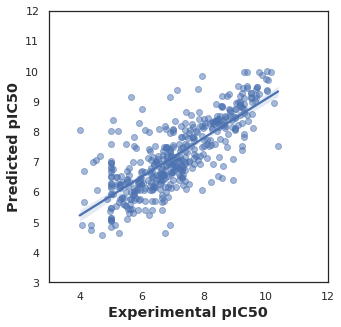

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


sns.set(color_codes=True)
sns.set_style("white")

Y_exp = pd.read_csv('/content/Pubchem_pIC50_exp.csv')
Y_pred = pd.read_csv('/content/Pubchem_pIC50_pred.csv')

ax = sns.regplot(Y_exp, Y_pred, scatter_kws={'alpha':0.5})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(3, 12)
ax.set_ylim(3, 12)
ax.figure.set_size_inches(5, 5)
plt.show